# How to use `contaminante`

In [1]:
import contaminante

First we'll need a target to try `contaminante` on. I've chosen *KIC 6804648*. This target was observed during the prime *Kepler* mission, and was flagged as a planet candidate. In fact, the target has a contaminating eclipsing binary. This binary is only obvious in some of the *Kepler* quarters. 

Below we run the target through `contaminante`. Running this cell should take less than 5 minutes.

In [3]:
kic, period, t0, duration = 6804648, 0.7006064790000001, 131.59767, 0.993/24

HBox(children=(FloatProgress(value=0.0, description='Modeling TPFs', max=18.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

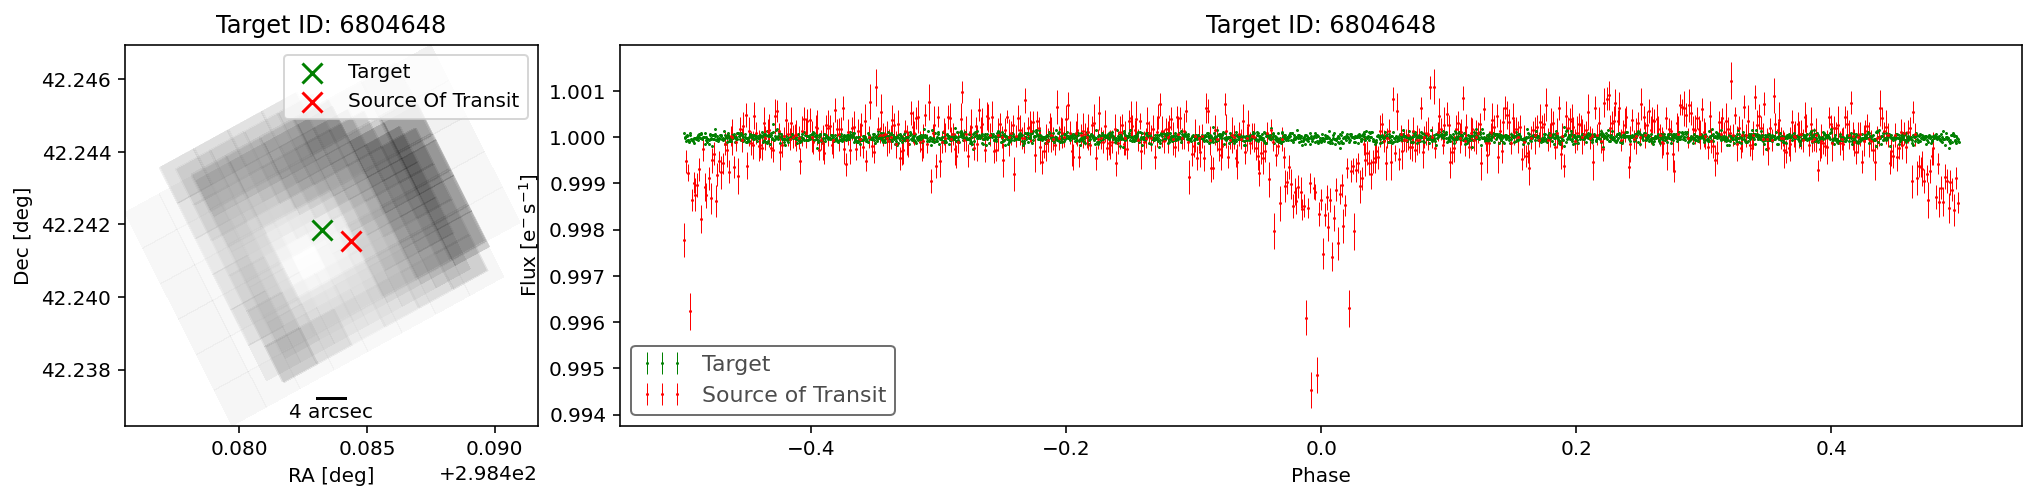

In [4]:
fig = contaminante.get_centroid_plot(targetid='KIC {}'.format(kic),
                               period=period,
                               t0=t0,
                               duration=duration,
                               mission='kepler')

Using `contaminante` we can see two pieces of evidence that this target is contaminated.
1. There is a significant offset between the center of the **target** (green cross) in the image, and the **source of the transiting signal** (red cross).
2. There is a significant difference between the **target** phase curve (green phase curve) and the **source of the transiting signal** phase curve (red phase curve).

To compare, we can look at a target that is a true, confirmed planet. Below I run the parameters for **Kepler-10** through `contaminate`.

In [5]:
kic, period, t0, duration = 11904151, 0.837491, 2454964.57513 - 2454833, 1.8076/24

HBox(children=(FloatProgress(value=0.0, description='Modeling TPFs', max=15.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

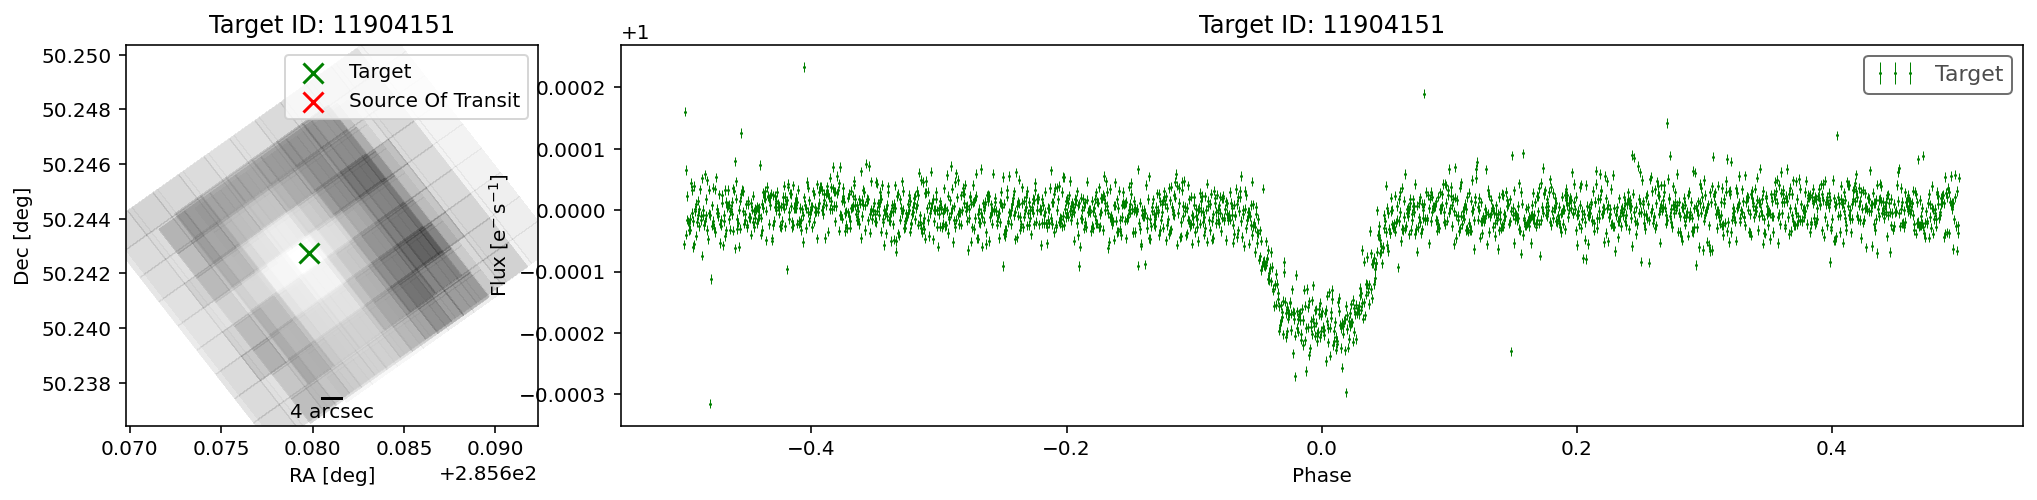

In [6]:
fig = contaminante.get_centroid_plot(targetid='KIC {}'.format(kic),
                               period=period,
                               t0=t0,
                               duration=duration,
                               mission='kepler')

Here there was no significant transiting source that was not the target, and so there is no red cross in the image, 
and no red phase curve in the phase curve diagram. Sometimes there will be a weak detection that there are other pixels that contain the transit, but there is frequently no significant shift if

1. The two sources line up in the image
2. There is no significant difference between the target aperture and the source aperture.

Cases such as this suggest the aperture you are using may not be optimal to recover all of the transiting signal.

### `contaminante` works on TESS Data!

`contaminante` works just as well on TESS data. `contaminante` will download TESS TPFs if they are available, otherwise the data will be cut out of the TESS FFI's using the MAST TESScut service. If using FFIs, scattered background will be removed using PCA.

HBox(children=(FloatProgress(value=0.0, description='Modeling TPFs', max=1.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

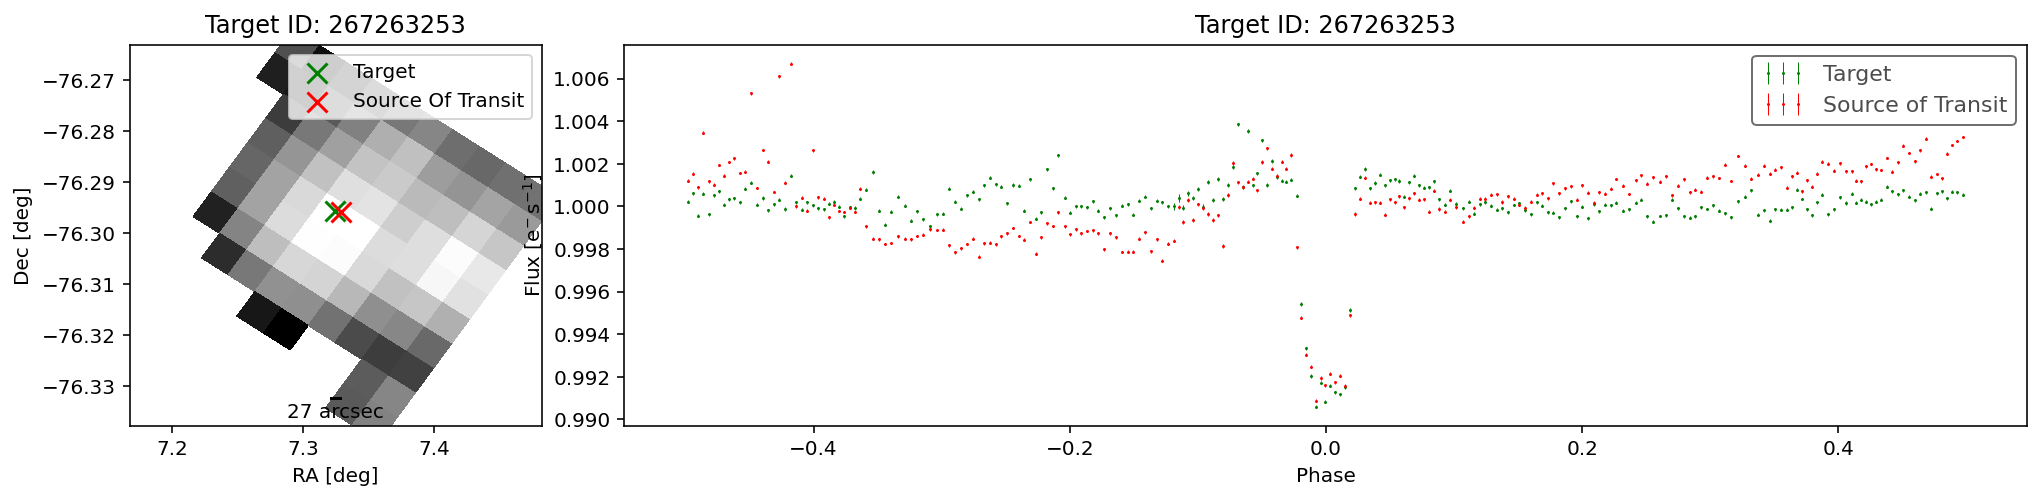

In [7]:
fig = contaminante.get_centroid_plot(targetid="TIC 267263253",
                        period=4.12688,
                        t0=2458325.78297 - 2457000,
                        duration=0.1, mission='tess')

### `contaminante` works on K2 Data!

`contaminante` works on K2 data too. The motion noise is removed using the same Self Flat Fielding technique used in `lightkurve`. Because of the K2 motion the results may be a little harder to interpret. For example, below there is a slight shift in the centroid, but the light curve from that target is not different from the main target. This is likely due to the pipeline apertures for K2 being slightly too small.

HBox(children=(FloatProgress(value=0.0, description='Modeling TPFs', max=2.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

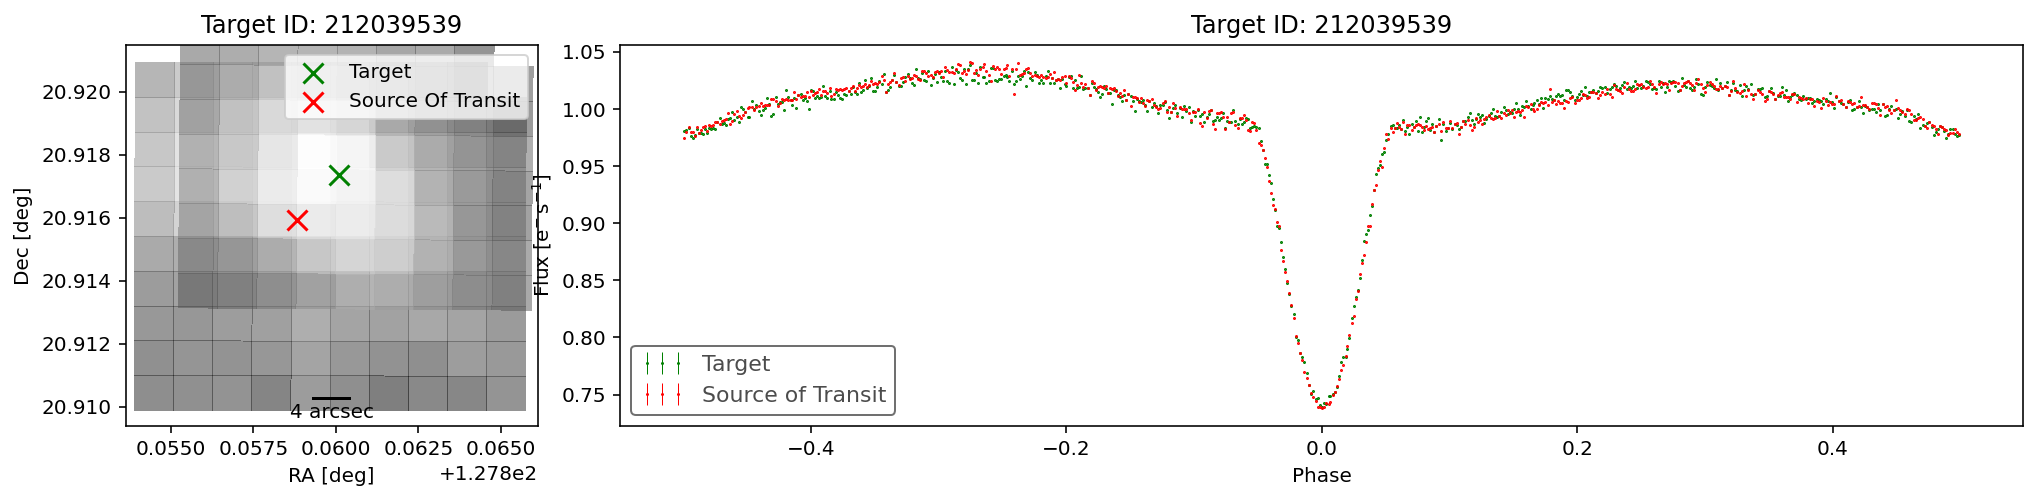

In [2]:
fig = contaminante.get_centroid_plot(targetid="EPIC 212039539",
                        period=2.229820,
                        t0=2458096.61073 - 2454833,
                        duration=0.1, mission='K2')